In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Website_Phishing_Detection.csv")
df.columns

Index(['id', 'Dots_num', 'Level_subD', 'Path_level', 'UrlLength', 'Dash_num',
       'Dash_in_Host', 'At_symbol', 'tilde', 'Underscore_num', 'percent',
       'Query_comp', 'Ampersand', 'Hash', 'NoHttps', 'random_str', 'IP',
       'domain_in_subd', 'domain_in_paths', 'https_in_host', 'double_slash',
       'sensitive_words', 'Emb_brand', 'favicon_ext', 'insecure_forms',
       'Class_label'],
      dtype='object')

**Data cleaning**

In [ ]:
df.head()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
4,5,3,0,4,46,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.tail()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
8284,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
8285,9997,2,1,4,59,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8286,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8287,9999,3,1,1,49,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8288,10000,3,1,2,52,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df.size

215514

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               8289 non-null   int64
 1   Dots_num         8289 non-null   int64
 2   Level_subD       8289 non-null   int64
 3   Path_level       8289 non-null   int64
 4   UrlLength        8289 non-null   int64
 5   Dash_num         8289 non-null   int64
 6   Dash_in_Host     8289 non-null   int64
 7   At_symbol        8289 non-null   int64
 8   tilde            8289 non-null   int64
 9   Underscore_num   8289 non-null   int64
 10  percent          8289 non-null   int64
 11  Query_comp       8289 non-null   int64
 12  Ampersand        8289 non-null   int64
 13  Hash             8289 non-null   int64
 14  NoHttps          8289 non-null   int64
 15  random_str       8289 non-null   int64
 16  IP               8289 non-null   int64
 17  domain_in_subd   8289 non-null   int64
 18  domain_i

In [ ]:
df.describe()

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,...,8289.000000,8289.000000,8289.000000,8289.0,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,4931.238509,2.486910,0.593799,3.275063,67.985161,1.536012,0.143322,0.000362,0.015080,0.314513,...,0.020388,0.022922,0.408734,0.0,0.000965,0.115213,0.059356,0.159850,0.847991,0.525998
std,3044.209967,1.366962,0.754117,1.880890,33.247789,2.764735,0.566279,0.019022,0.121879,1.102005,...,0.141334,0.149664,0.491630,0.0,0.031053,0.378757,0.236304,0.366489,0.359051,0.499354
min,1.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2073.000000,2.000000,0.000000,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4785.000000,2.000000,1.000000,3.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,7928.000000,3.000000,1.000000,4.000000,81.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10000.000000,21.000000,11.000000,18.000000,253.000000,26.000000,9.000000,1.000000,1.000000,18.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Dots_num,0
Level_subD,0
Path_level,0
UrlLength,0
Dash_num,0
Dash_in_Host,0
At_symbol,0
tilde,0
Underscore_num,0


**EDA**

<ipython-input-9-7bb75ce0baf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class_label', data=df, palette='pastel')


<Axes: xlabel='Class_label', ylabel='count'>

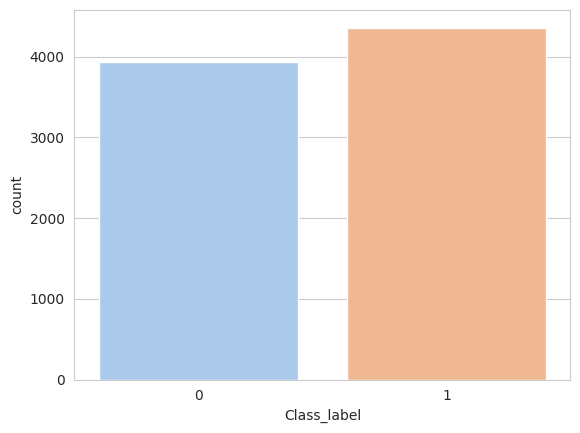

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Class_label', data=df, palette='pastel')

<ipython-input-10-fed3d52629ed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Class_label'], color='darkred')


<Axes: xlabel='Class_label', ylabel='Density'>

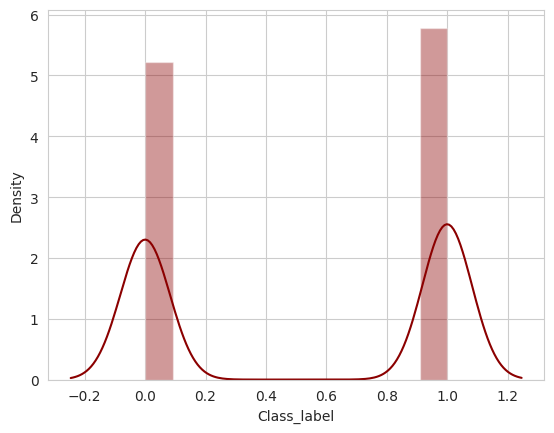

In [ ]:
sns.distplot(df['Class_label'], color='darkred')

In [ ]:
df= df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,id,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,...,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms,Class_label
0,1061,1,0,4,43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,5093,3,1,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4644,8,0,4,106,0,0,0,0,0,...,0,0,1,0,0,2,0,0,1,1
3,3950,2,1,2,54,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7707,2,0,2,62,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,111,3,1,3,47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8285,3536,4,1,10,88,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
8286,996,2,0,7,125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8287,9,8,7,2,76,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,1


Text(0.5, 1.0, 'ID vs Class_label')

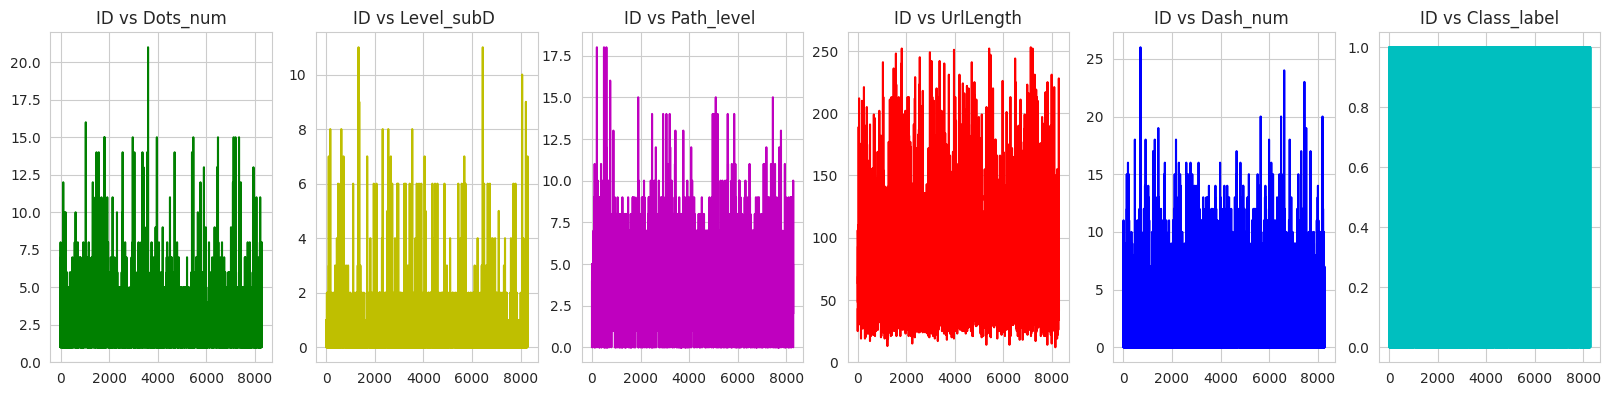

In [ ]:
x1 = df['Dots_num']
x2 = df['Level_subD']
x3 = df['Path_level']
x4 = df['UrlLength']
x5 = df['Dash_num']
x6 = df['Class_label']
x7 = df['Dash_in_Host']
x8 = df['tilde']
plt.figure(figsize=(20,30))
plt.subplot(6,6,1)
plt.plot(x1, c='g')
plt.title("ID vs Dots_num")
plt.subplot(6,6,2)
plt.plot(x2, c='y')
plt.title("ID vs Level_subD ")
plt.subplot(6,6,3)
plt.plot(x3, c='m')
plt.title("ID vs Path_level ")
plt.subplot(6,6,4)
plt.plot(x4, c='r')
plt.title("ID vs UrlLength")
plt.subplot(6,6,5)
plt.plot(x5, c='b')
plt.title("ID vs Dash_num ")
plt.subplot(6,6,6)
plt.plot(x6, c='c')
plt.title("ID vs Class_label")

Text(0.5, 1.0, ' Dash_in_Host vs Class_label ')

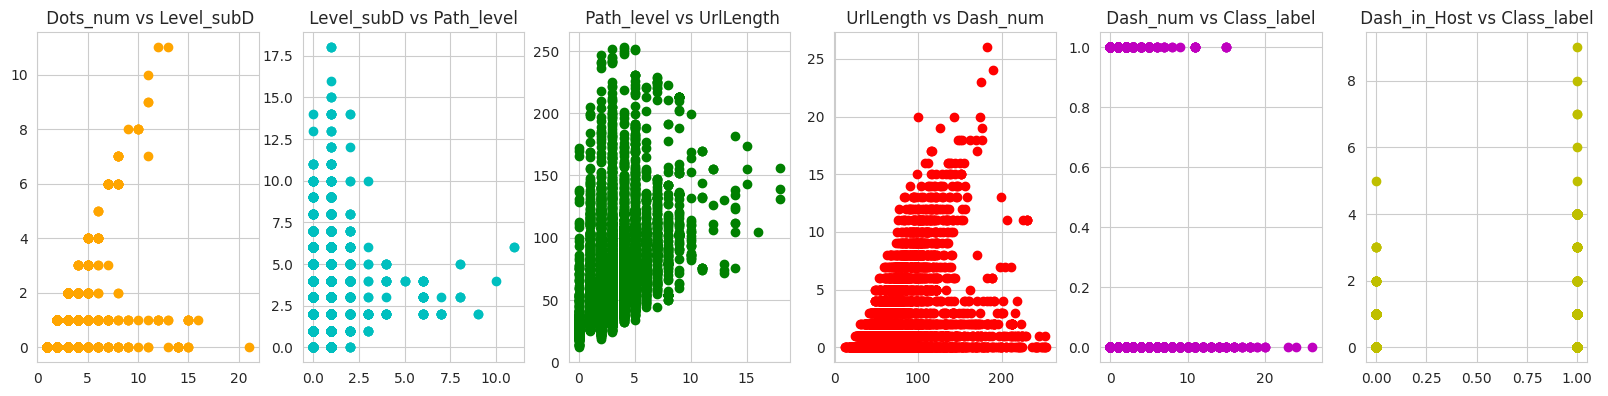

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(6,6,1)
plt.scatter(x1,x2, c='orange')
plt.title(" Dots_num vs Level_subD")
plt.subplot(6,6,2)
plt.scatter(x2,x3, c='c')
plt.title(" Level_subD vs Path_level ")
plt.subplot(6,6,3)
plt.scatter(x3,x4, c='g')
plt.title(" Path_level vs UrlLength")
plt.subplot(6,6,4)
plt.scatter(x4,x5, c='r')
plt.title(" UrlLength vs Dash_num ")
plt.subplot(6,6,5)
plt.scatter(x5,x6, c='m')
plt.title(" Dash_num vs Class_label ")
plt.subplot(6,6,6)
plt.scatter(x6,x7, c='y')
plt.title(" Dash_in_Host vs Class_label ")

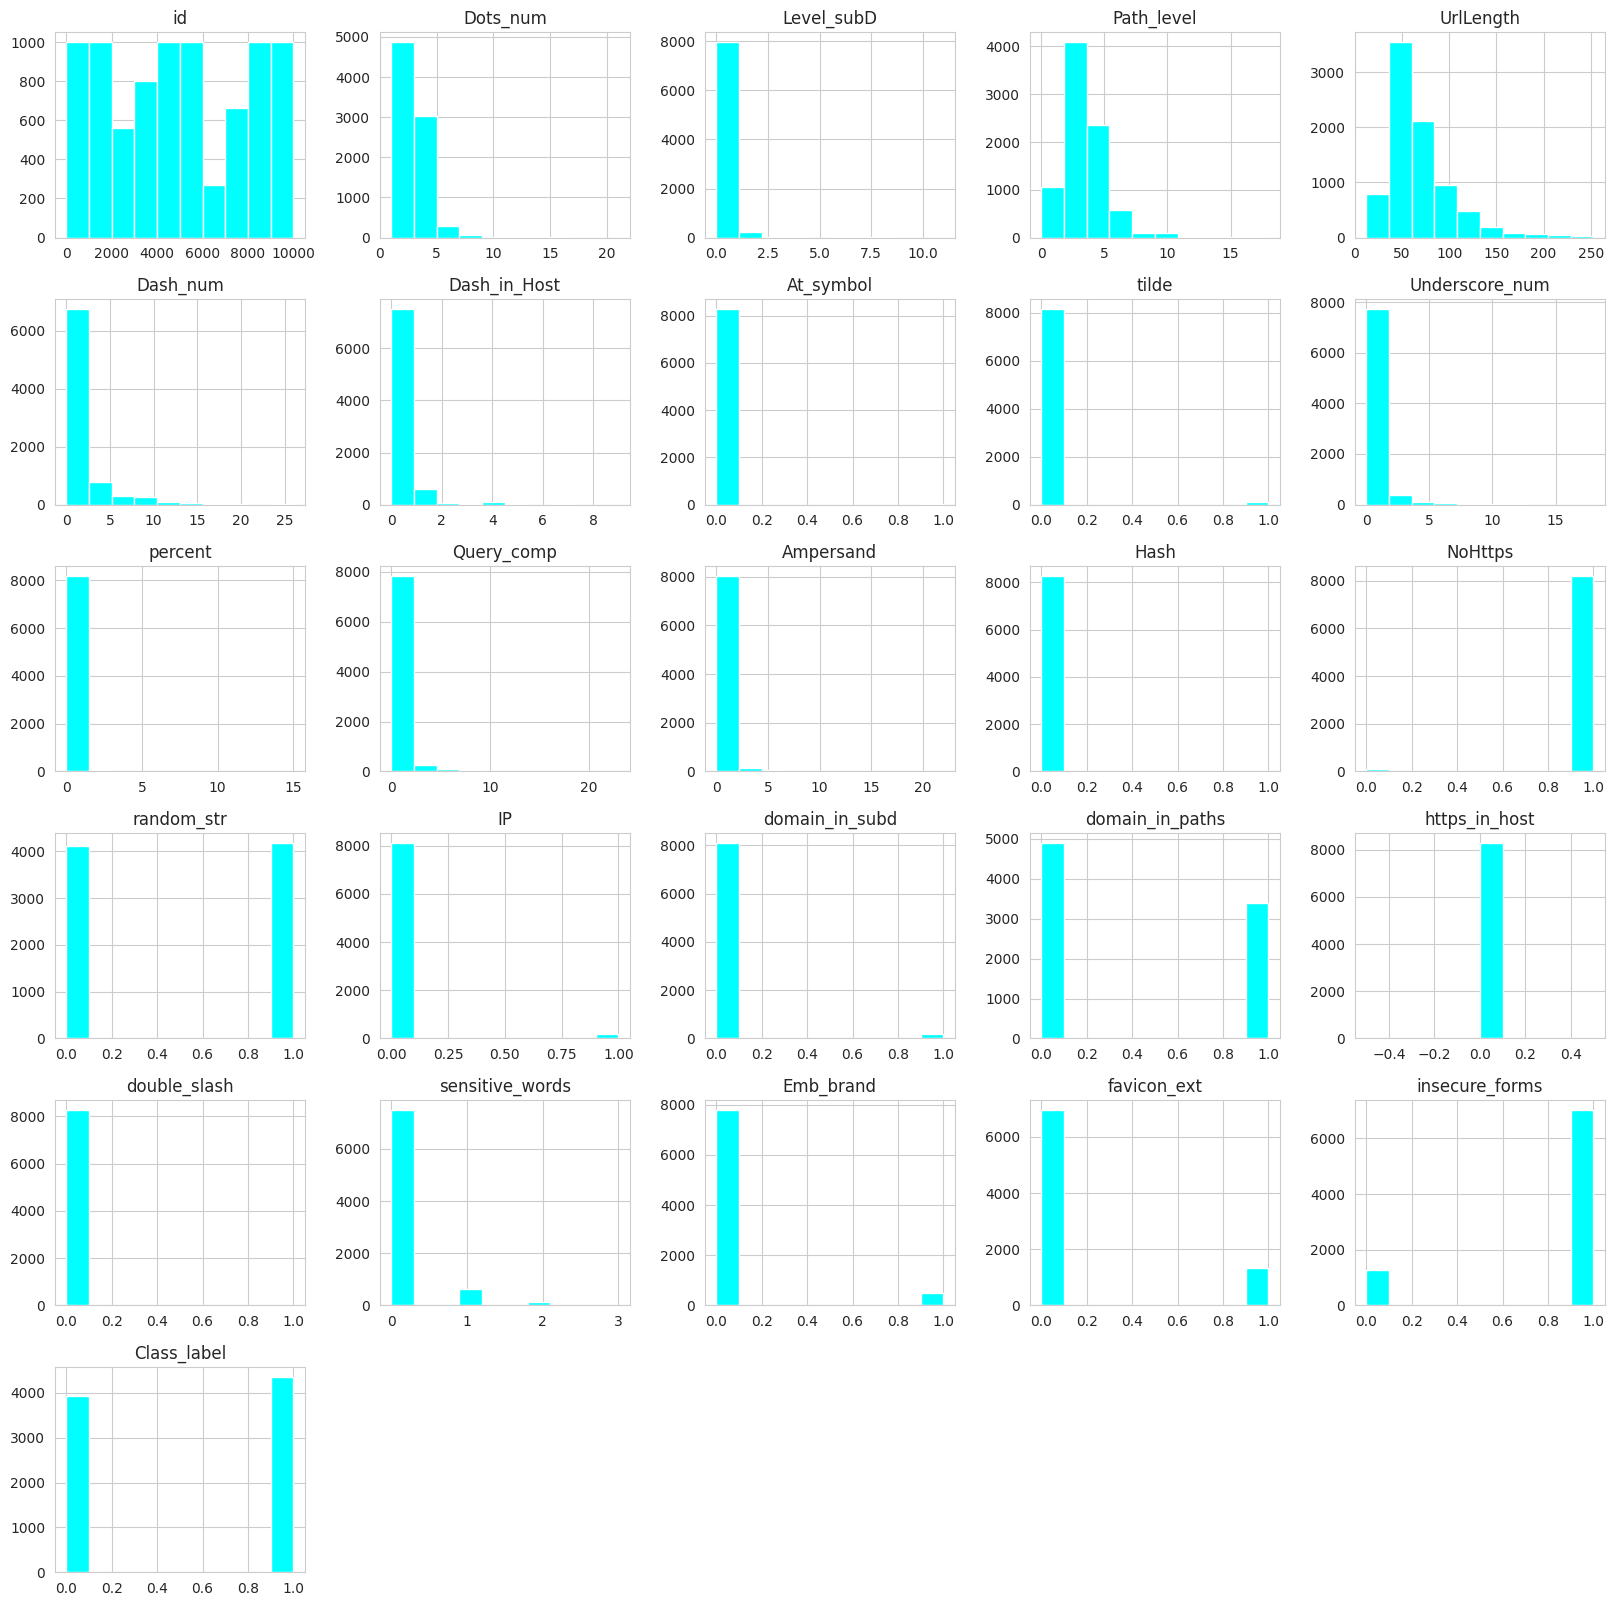

In [ ]:
df.hist(bins = 10,figsize = (20,20), color='cyan')
plt.show()

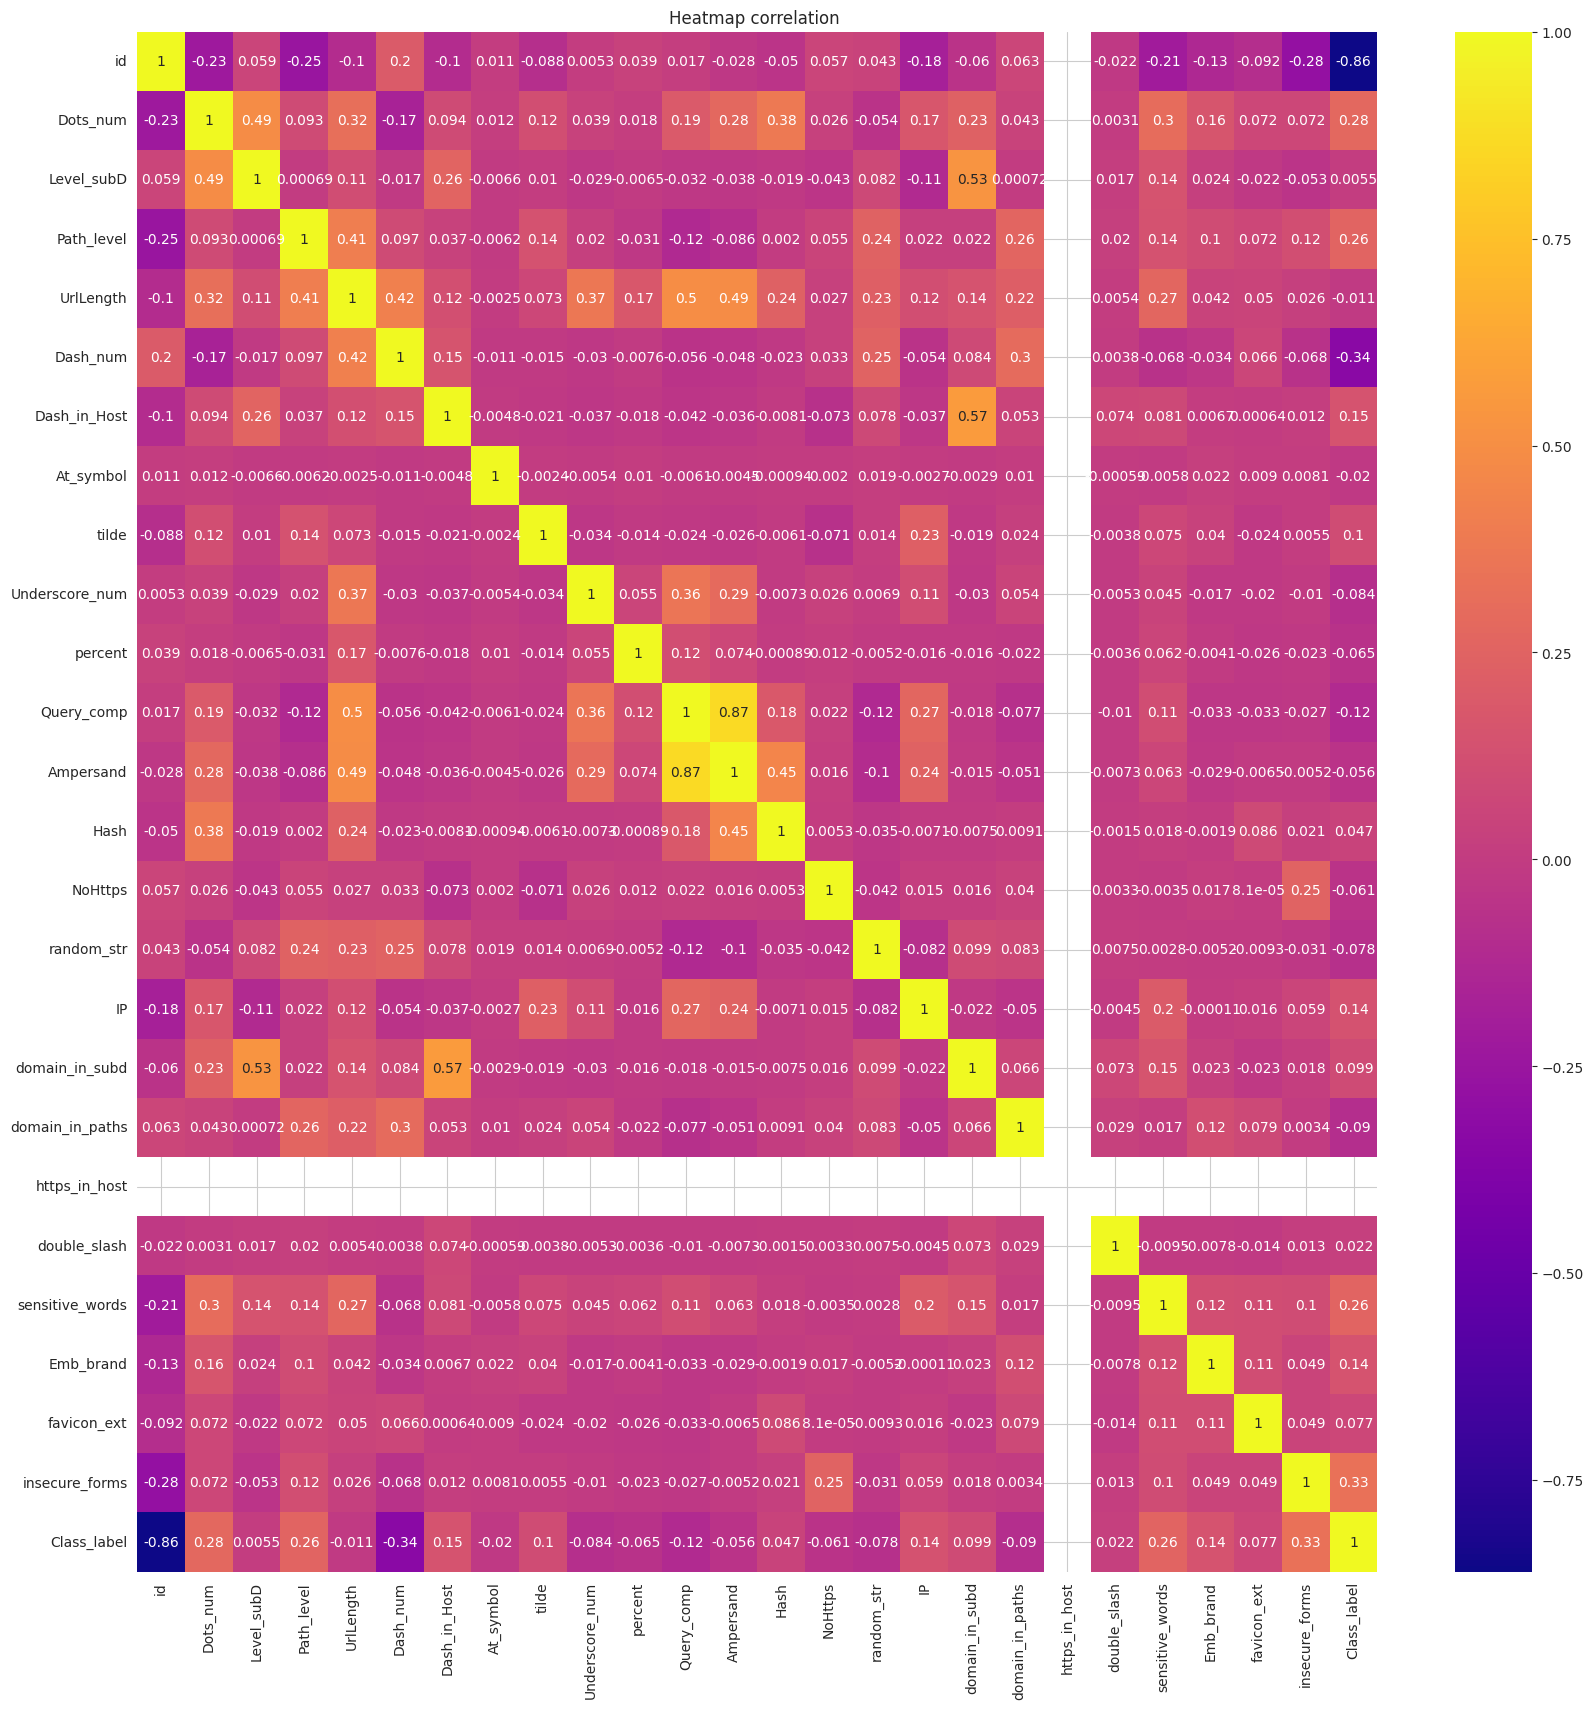

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='plasma',annot=True)
plt.title("Heatmap correlation ")
plt.show()

**Data Preprocessing**

In [ ]:
x = df.drop(columns=['id', 'Class_label'],axis=1)
y = df['Class_label']

In [ ]:
print("Size of X is: " , x.size)
print("Size of Y is: " , y.size)
print("Shape of X is " , x.shape)
print("Shape of Y is " , y.shape)

Size of X is:  198936
Size of Y is:  8289
Shape of X is  (8289, 24)
Shape of Y is  (8289,)


In [ ]:
y

,Class_label
0,1
1,0
2,1
3,1
4,0
...,...
8284,1
8285,1
8286,1
8287,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30, random_state=110)

In [ ]:
X_train

,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,percent,...,random_str,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms
7690,3,0,1,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6974,2,0,4,83,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8205,2,0,3,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8244,3,0,4,74,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2532,3,0,5,223,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,2,0,1,46,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4527,4,1,2,79,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6525,3,1,8,54,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2109,2,0,7,124,0,0,0,0,5,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
Y_train

,Class_label
7690,1
6974,0
8205,1
8244,1
2532,1
...,...
2944,0
4527,1
6525,1
2109,0


In [ ]:
X_test

,Dots_num,Level_subD,Path_level,UrlLength,Dash_num,Dash_in_Host,At_symbol,tilde,Underscore_num,percent,...,random_str,IP,domain_in_subd,domain_in_paths,https_in_host,double_slash,sensitive_words,Emb_brand,favicon_ext,insecure_forms
2743,3,1,3,55,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5618,3,2,8,178,4,3,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
1994,3,1,2,93,9,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3524,3,1,3,57,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7794,2,0,2,38,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,1,0,2,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7002,1,0,4,79,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5178,2,0,3,42,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5959,3,1,2,122,4,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y_test

,Class_label
2743,0
5618,1
1994,0
3524,0
7794,1
...,...
5524,1
7002,1
5178,1
5959,0


In [ ]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Apply Random Forest**

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1158
           1       0.89      0.90      0.90      1329

    accuracy                           0.89      2487
   macro avg       0.89      0.89      0.89      2487
weighted avg       0.89      0.89      0.89      2487

[[1015  143]
 [ 136 1193]]
Random Forest Accuracy: 88.7816646562123%
Random Forest Log Loss: 42.747325930955725%


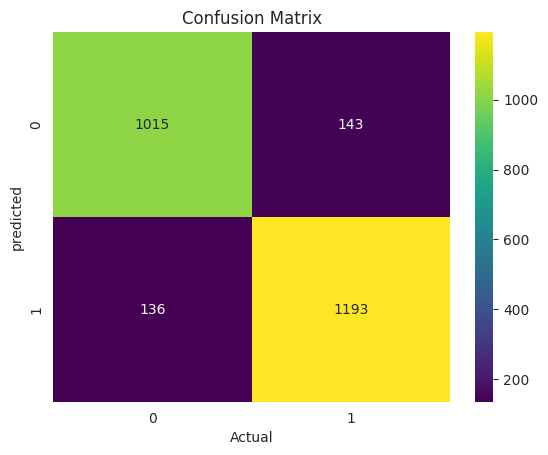

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)
print(classification_report(Y_test, RF_pred))
print(confusion_matrix(Y_test, RF_pred))
RF_acc = accuracy_score(Y_test, RF_pred)
print(f"Random Forest Accuracy: {RF_acc*100}%")
RF_prob = RF.predict_proba(X_test)
RF_loss = log_loss(Y_test, RF_prob)
print(f"Random Forest Log Loss: {RF_loss*100}%")
cm = confusion_matrix(Y_test, RF_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=RF.classes_,
            yticklabels=RF.classes_)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Confusion Matrix')
plt.show()

**Apply GRU**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6595 - loss: 0.6426 - val_accuracy: 0.8122 - val_loss: 0.4736
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8179 - loss: 0.4463 - val_accuracy: 0.8398 - val_loss: 0.4007
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8386 - loss: 0.3717 - val_accuracy: 0.8424 - val_loss: 0.3661
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8544 - loss: 0.3537 - val_accuracy: 0.8544 - val_loss: 0.3436
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8586 - loss: 0.3371 - val_accuracy: 0.8613 - val_loss: 0.3470
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8637 - loss: 0.3242 - val_accuracy: 0.8734 - val_loss: 0.3203
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8705 - loss: 0.3131 - val_accuracy: 0.8786 - val_loss: 0.3122
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8689 - loss: 0.3189 - val_accuracy: 0.8786 - val_

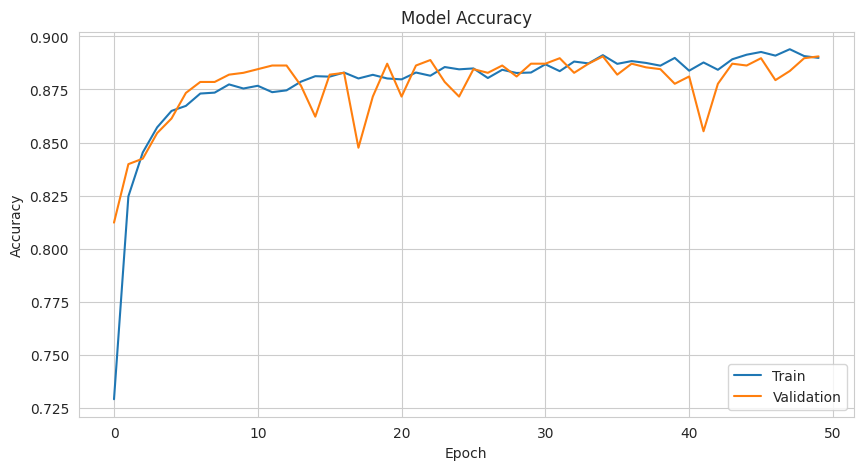

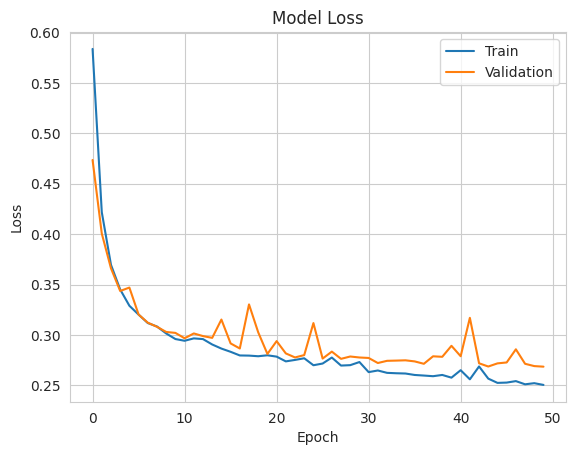

In [ ]:
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
timesteps = 1
X_train_reshape = X_train.values.reshape((X_train.shape[0], timesteps, X_train.shape[1]))
X_test_reshape = X_test.values.reshape((X_test.shape[0], timesteps, X_test.shape[1]))
M = Sequential()
M.add(GRU(units=64, return_sequences=True, input_shape=(timesteps, X_train.shape[1])))
M.add(Dense(1, activation='sigmoid'))
M.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = M.fit(X_train_reshape, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
pred_loss, pred_accuracy = M.evaluate(X_test_reshape, Y_test, verbose=0)
print(f"GRU Test Loss: {pred_loss * 100:.4f}%")
print(f"GRU Test Accuracy: {pred_accuracy * 100:.4f}%")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.show()

Epoch 1/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8948 - loss: 0.2509 - val_accuracy: 0.8734 - val_loss: 0.3083
Epoch 2/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9001 - loss: 0.2504 - val_accuracy: 0.8708 - val_loss: 0.3164
Epoch 3/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9013 - loss: 0.2456 - val_accuracy: 0.8717 - val_loss: 0.3154
Epoch 4/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8964 - loss: 0.2586 - val_accuracy: 0.8734 - val_loss: 0.3299
Epoch 5/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8993 - loss: 0.2455 - val_accuracy: 0.8734 - val_loss: 0.3210
Epoch 6/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8887 - loss: 0.2593 - val_accuracy: 0.8777 - val_loss: 0.3049
Epoch 7/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8952 - loss: 0.2462 - val_accuracy: 0.8777 - val_loss: 0.3071
Epoch 8/35
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 0.2570 - val_accuracy: 

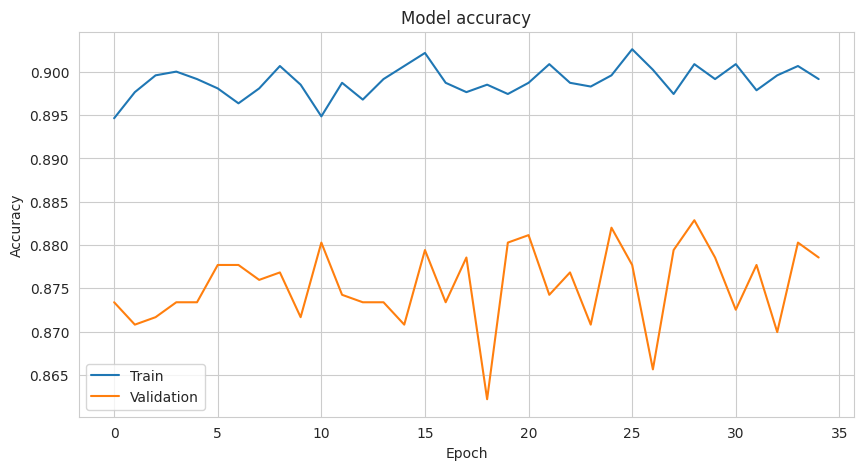

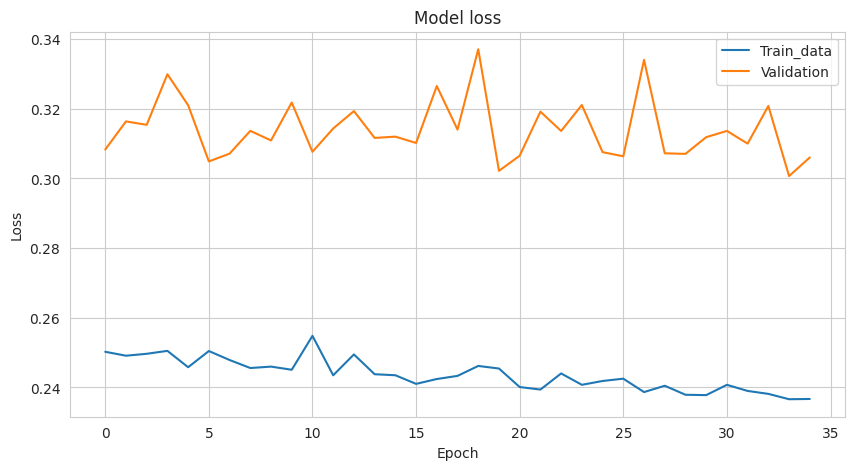

In [ ]:
history = M.fit(X_train_reshape, Y_train, epochs=35, batch_size=32, verbose=1, validation_split=0.2)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_data', 'Validation'], loc='best')
plt.show()

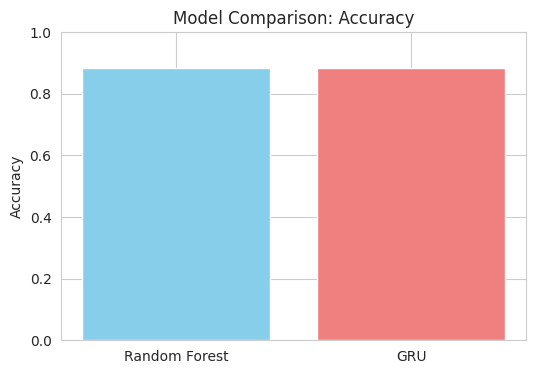

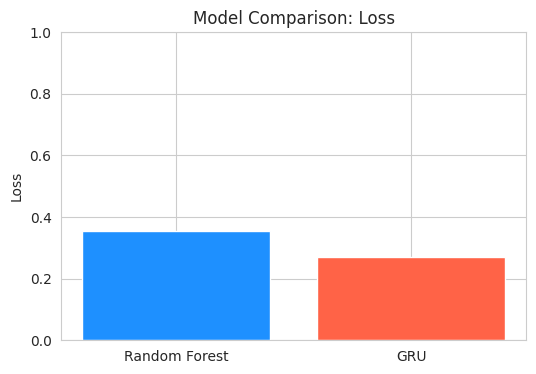

In [ ]:
results = {
    'Model': ['Random Forest', 'GRU'],
    'Accuracy': [RF_acc, RF_acc],
    'Loss': [RF_loss, pred_loss]
}
results_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue', 'lightcoral'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
results_df = pd.DataFrame(results)
plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['Loss'], color=['dodgerblue', 'tomato'])
plt.title('Model Comparison: Loss')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.show()

In [ ]:
df = pd.read_csv('/content/Website_Phishing_Detection.csv')
df.to_pickle('/content/Website_Phishing_Detection.pkl')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
joblib.dump(model, 'Website_Phishing_Detection.pkl')
model = joblib.load('Website_Phishing_Detection.pkl')


In [ ]:
print(type(model))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import numpy as np
import joblib
from urllib.parse import urlparse
import re
import os
from sklearn.ensemble import RandomForestClassifier
model_path = 'Website_Phishing_Detection_model.pkl'
if os.path.exists(model_path):
   try:
        model = joblib.load(model_path)
        print("Model loaded successfully.")
   except Exception as e:
        print(f"Error loading model: {e}")
        model = None
else:
    print(f"Model file '{model_path}' does not exist.")
    model = None

def extract_features(url):
    """Extract features from a URL."""
    parsed_url = urlparse(url)

    features = [
        len(url),
        url.count('.'),
        url.count('/'),
        url.count('-'),
        url.count('@'),
        url.count('?'),
        url.count('='),
        url.count('http'),
        url.count('https'),
        url.count('www'),
        len(parsed_url.netloc),
        len(parsed_url.path),
        len(parsed_url.query),
        len(parsed_url.fragment),
        int(bool(parsed_url.username)),
        int(bool(parsed_url.password)),
        int(bool(re.search(r'[~!@#$%^&*()_+=[\]{};\':"\\|,.<>/?]', url))),
        int(bool(re.search(r'\d', url))),
        int(bool(re.search(r'[a-zA-Z]', url))),
        int(bool(re.search(r'//', url[7:]))),
        int(bool(re.search(r'[?|&]redirect=', url))),
        int(bool(re.search(r'shorturl', url))),
        int(bool(re.search(r'tinyurl', url))),
        int(bool(re.search(r'bit\.ly', url)))
    ]
    return features

def predict_website(url):
    """Predict whether the website is secure or not."""
    features = np.array(extract_features(url)).reshape(1, -1)
    prediction = model.predict(features)[0]
    return "secure" if prediction == 0 else "not secure"
if __name__ == "__main__":
    if model and isinstance(model, RandomForestClassifier):
        url = input("Enter the website URL: ")
        result = predict_website(url)
        print(f"Website is {result}.")
    else:
        print("Model is not loaded or is of incorrect type. Please check the model file.")

Model loaded successfully.
Enter the website URL: w3schools
Website is secure.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
